Train HOG Classifier
===


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import pickle
from sklearn.svm import LinearSVC
from lesson_functions import *
from find_cars import *

### Load classifier

In [2]:
svc_data = load_classifier()
print(svc_data)

{'spatial_size': (32, 32), 'hog_channel': 'ALL', 'hist_feat': True, 'svc': LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'hog_feat': True, 'hist_bins': 32, 'spatial_feat': True, 'X_scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'orient': 9, 'pix_per_cell': 8, 'color_space': 'YCrCb', 'cell_per_block': 2}


### Test images

In [3]:
images = sorted(glob.glob('test_images/out*.png'))
print(images)

[]


### Multiscaled grid for vehicle detection

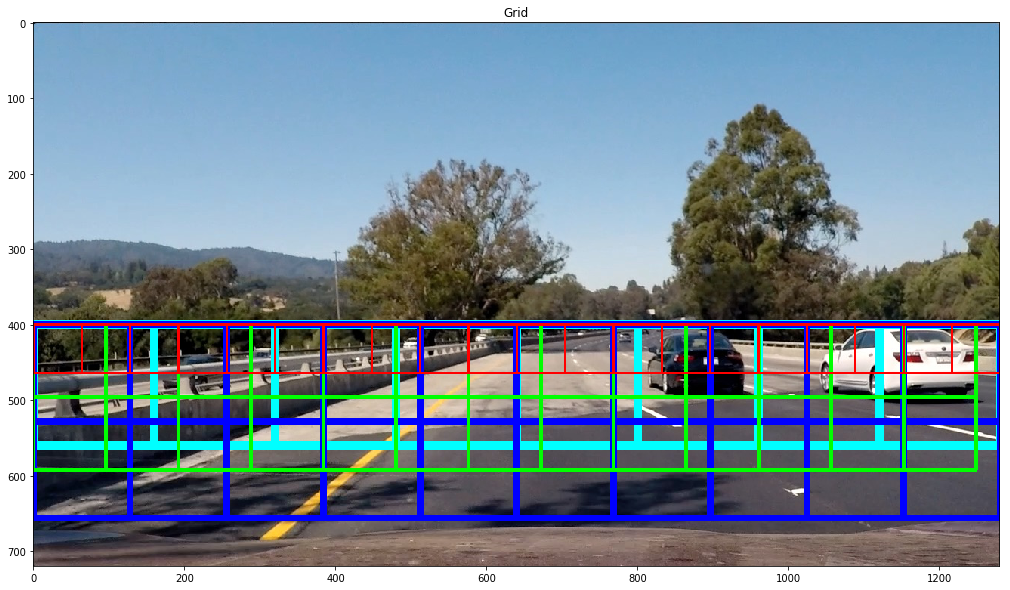

In [2]:
img = mpimg.imread('test_images/test4.jpg')

ystart = 400
ystop = 656
scale = 1

draw_img = np.copy(img)

bboxes = find_cars_grid_160(img)
draw_img = draw_boxes(draw_img, bboxes, color=(0, 255, 255), thick=10)

bboxes = find_cars_grid_128(img)
draw_img = draw_boxes(draw_img, bboxes, color=(0, 0, 255), thick=8)

bboxes = find_cars_grid_96(img)
draw_img = draw_boxes(draw_img, bboxes, color=(0, 255, 0), thick=4)

bboxes = find_cars_grid_64(img)
draw_img = draw_boxes(draw_img, bboxes, color=(255, 0, 0), thick=2)

fig = plt.figure(figsize=(20,10))
plt.imshow(draw_img)
plt.title('Grid')
plt.show()


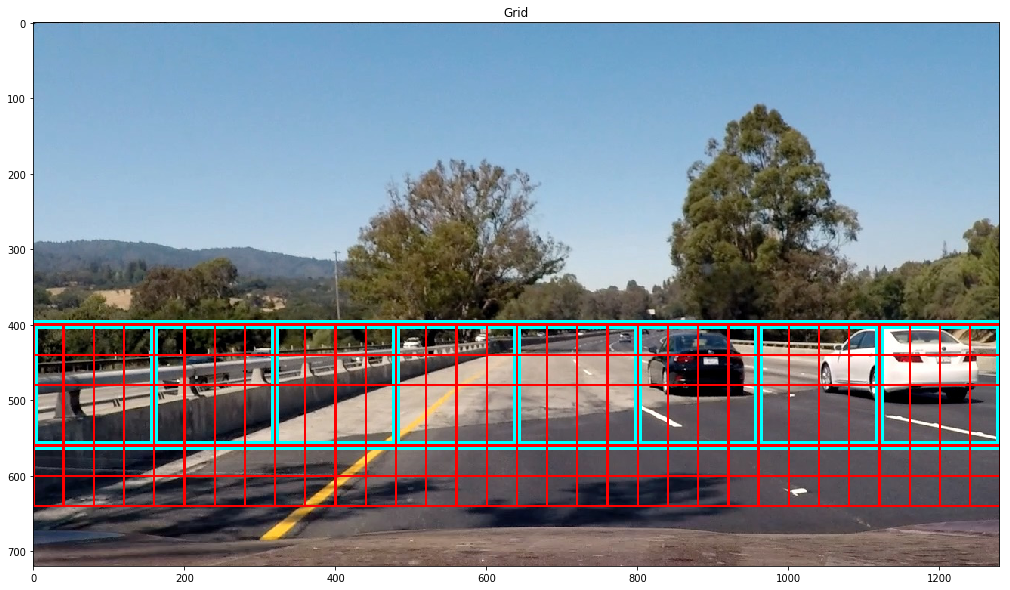

In [9]:
ystart = 400
ystop = 656
scale = 1

draw_img = np.copy(img)

bboxes = find_cars_grid_160(img, cells_per_step=8)
draw_img = draw_boxes(draw_img, bboxes, color=(0, 255, 255), thick=10)

bboxes = find_cars_grid_160(img, cells_per_step=2)
draw_img = draw_boxes(draw_img, bboxes, color=(255, 0, 0), thick=2)

#bboxes = find_cars_grid_128(img)
#draw_img = draw_boxes(draw_img, bboxes, color=(0, 0, 255), thick=8)

#bboxes = find_cars_grid_96(img)
#draw_img = draw_boxes(draw_img, bboxes, color=(0, 255, 0), thick=4)

#bboxes = find_cars_grid_64(img)
#draw_img = draw_boxes(draw_img, bboxes, color=(255, 0, 0), thick=2)

fig = plt.figure(figsize=(20,10))
plt.imshow(draw_img)
plt.title('Grid')
plt.show()


0.25 Seconds to detect
2 cars found


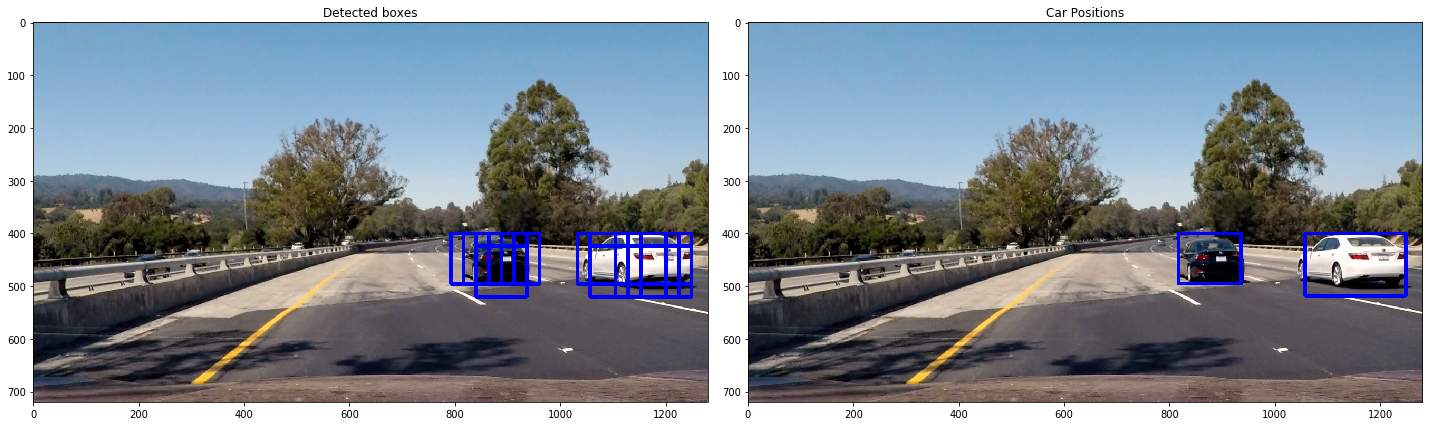

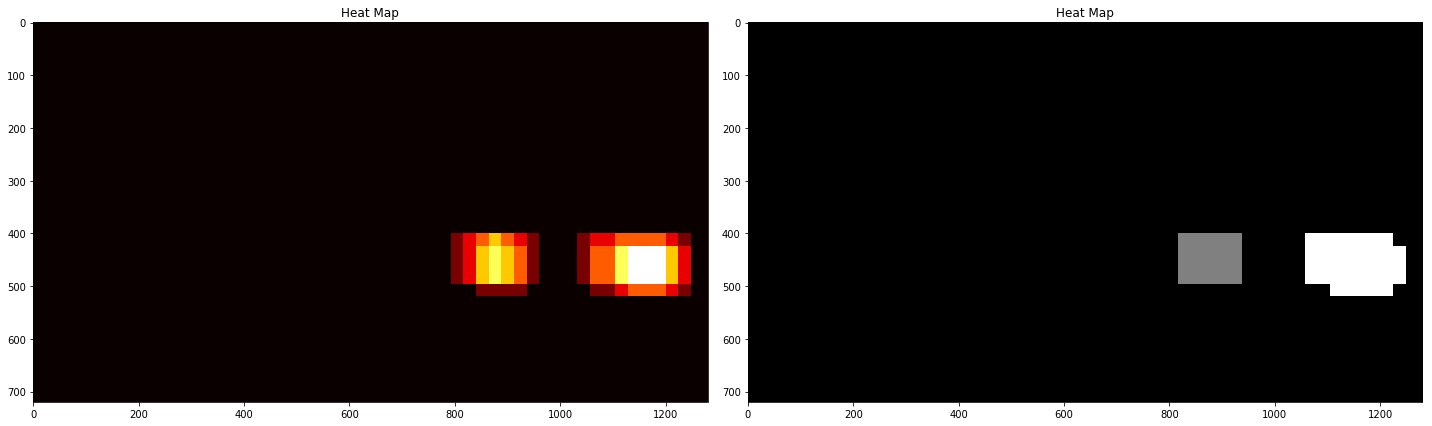

In [4]:
from find_cars import load_classifier, find_cars_multiscale, detect_vehicles
from scipy.ndimage.measurements import label
%matplotlib inline

load_classifier()

#img = mpimg.imread('test_images/test1.jpg')
#img = mpimg.imread('test_images/test2.jpg')
#img = mpimg.imread('test_images/test3.jpg')
img = mpimg.imread('test_images/test4.jpg')
#img = mpimg.imread('test_images/test5.jpg')
#img = mpimg.imread('test_images/test6.jpg')

t=time.time()
bboxes = find_cars_multiscale(img, verbose=False)
t2 = time.time()
print(round(t2-t, 5), 'Seconds to detect')

bboxes, hot_windows, heatmap, labels = detect_vehicles(img, 0, verbose=True)

print(len(bboxes), 'cars found')

draw_img1 = draw_boxes(img, hot_windows)
draw_img2 = draw_boxes(img, bboxes)

fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(draw_img1)
plt.title('Detected boxes')

plt.subplot(122)
plt.imshow(draw_img2)
plt.title('Car Positions')
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')

plt.subplot(122)
plt.imshow(labels[0], cmap='gray')
plt.title('Heat Map')
fig.tight_layout()
plt.show()